<a href="https://colab.research.google.com/github/Mamolinac/Business-intelligence/blob/main/Primer_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parcial 1**


Iniciamos con la implementación de los tres modelos, para determinar si el número de juegos jugados por en NBA está por encima del promedio.


1. Para iniciar, empezamos importando las librerías necesarias para cada modelo

In [ ]:
import numpy as np #Posee funciones matemáticas
import pandas as pd #Comunicación con el excel
import matplotlib.pyplot as plt
import seaborn as sns


#Se procede con la implementación del modelo

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

#Conectamos con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Cargamos la base de datos y seleccionamos las variables de entrada y salida



**Expliación de las variables**

**Variable de salida (dependiente)**

**games_played:** Número de juegos jugados por el jugador en la temporada. Es la variable objetivo que se quiere predecir, determinando si está por encima del promedio.

**Variables de entrada (independientes)**

**Salary:** Salario del jugador en la temporada. Puede influir en la cantidad de juegos jugados, ya que los jugadores con salarios más altos suelen ser titulares o jugadores clave con mayor tiempo de juego.

**Age:** Edad del jugador. A medida que los jugadores envejecen, pueden experimentar un declive en su rendimiento o mayor propensión a lesiones, lo que podría afectar su participación en los juegos.

**Height:** Altura del jugador (en centímetros o pies). La altura puede estar relacionada con la posición en la cancha y la cantidad de minutos jugados.

**Weight:** Peso del jugador (en kilogramos o libras). Junto con la altura, el peso puede ser un indicador del físico del jugador y su resistencia en la temporada.

**games_started:** Número de juegos en los que el jugador ha sido titular. Los jugadores que inician los juegos tienden a tener más minutos en cancha y, por ende, podrían jugar más partidos.

**minutes_per_game:** Promedio de minutos jugados por partido. Un jugador con mayor tiempo en cancha probablemente tenga más oportunidades de jugar más partidos.

**assists:** Número total de asistencias en la temporada. Puede indicar el rol del jugador en la ofensiva y su importancia dentro del equipo.

**blocks:** Número total de bloqueos en la temporada. Los bloqueos suelen ser una métrica clave para jugadores defensivos y podrían correlacionarse con la cantidad de minutos jugados.

**steals:** Número total de robos de balón en la temporada. Como en el caso de los bloqueos, este es un indicador de desempeño defensivo y puede influir en la cantidad de juegos jugados.


In [ ]:
nxl='/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played']]
threshold = XDB['games_played'].mean()
XDB['games_played_bin'] = (XDB['games_played'] > threshold).astype(int) # Crea una columna que indica si un jugador jugó más o menos que el promedio.

#seleccionar las variables
XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd=XDB[['games_played_bin']]




In [ ]:
XDB=XDB.dropna()
display(XDB)
len(np.where(yd==1)[0])/len(XD)

salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played  games_played_bin  labels  
0       0.5     1.8           966                 1       4  
1       0.5     1.4          1346                 1       2  
2       0.6     1.1          1274                 1       1  
3       0.2     1.0          1100                 1       1  
4       2.2     0.7          1392                 1       1  
..      ...     ...           ...               ...     ...  
440     0.2     0.4            70                 0       4  
441     0.5     1.2            24                 0       4  
442     0.0     0.0             5                 0       4  
443     0.5     1.0            68                 0       1  
444     0.0     0.0            12                 0       4  

[445 rows x 12 columns]

0.42696629213483145

In [ ]:
#Se cuenta el número de personas encuestadas
total_respondents = len(XDB)

print(f"Número total de personas que respondieron: {total_respondents}")

Número total de personas que respondieron: 445


3. Empezamos a implementar el model de Naive Bayes.

El modelo Naive Bayes es un algoritmo de aprendizaje automático supervisado que se utiliza principalmente para la clasificación. Se basa en el teorema de Bayes, que calcula la probabilidad de un evento dado que otro evento ya ha ocurrido.
Su principal ventaja es su eficiencia y facilidad de uso, pero su suposición de independencia entre las características puede ser una limitación en algunos casos.

In [ ]:
from sklearn.naive_bayes import GaussianNB

mnb=GaussianNB() #Aloja el modelo
mnb.fit(XD,yd) #Entrena el modelo

#Obtenemos la información del modelo
u=mnb.theta_ #Obtenemos la media de las variables
print("La media de las variables es:\n",u)
var=mnb.var_ #Se calculan las varianzas
print('La varianza de las variables es:\n', var)
sigma=np.sqrt(var) #Se calcula la desviación estándar
print("La desviación estándar de las variables es:\n",sigma)

#Se determinan los límites superiores e inferiores de los datos
LS=u+sigma
LI=u-sigma
print("El límite superior de las variables es:\n",LS)
print("El límite inferior de las variables es:\n",LI)



La media de las variables es:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de las variables es:
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de las variables es:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El límite superior de las variables

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ahora vamos a determinar a la persona con este modelo

In [ ]:
#Evaluamos un solicitante
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]


ydp = mnb.predict(XDS)
print("La predicción del solicitante es:\n", ydp)

if ydp == 1:
  print("El jugador está por encima del promedio")

if ydp == 0:
  print("El jugador está por debajo del promedio")


La predicción del solicitante es:
 [0]
El jugador está por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Ahora vamos a evaluar el modelo Naive Bayes


In [ ]:
from sklearn.metrics import confusion_matrix

#Hacemos un barrido de los datos
ydp2=mnb.predict(XD) #hacemos el pronóstico para todos los datos base
cm=confusion_matrix(yd,ydp2) #crea la matriz de confusión
print("La matriz de confusión es: \n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


Ex=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es: \n",Ex)
#todas las métricas que me den por encima del 75% es bueno.

#tasa de error: mal funcionamiento o error del modelo
TE=(FP+FN)/(VP+VN+FP+FN)
print("La tasa de error del modelo es: \n",TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es: 
 [[236  19]
 [ 76 114]]
La exactitud del modelo es: 
 0.7865168539325843
La tasa de error del modelo es: 
 0.21348314606741572
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La precisión negativa del modelo es:
 0.7564102564102564


**Análisis de datos**


Con base en la información suministrada, se desarrolló un modelo de Naive Bayes para determinar si el número de juegos jugados por un jugador de la NBA está por encima del promedio. Para ello, se consideraron variables relevantes como salario, edad, estatura, peso, juegos iniciados, minutos por partido, asistencias, bloqueos y robos.

El modelo alcanzó una exactitud del 78.65%, lo que indica un desempeño aceptable en la clasificación de jugadores con juegos jugados por encima del promedio. La precisión del modelo fue del 85.71%, lo que significa que, de los jugadores identificados como "por encima del promedio", un alto porcentaje realmente lo están.

Sin embargo, la sensibilidad del modelo fue del 60%, lo que refleja una mayor dificultad en la identificación de jugadores que realmente juegan más del promedio. A pesar de esto, la especificidad se mantuvo en 92.55%, evidenciando un criterio sólido en la clasificación de jugadores que juegan menos del promedio. Esto indica que el modelo es muy bueno identificando a los jugadores con menor participación en juegos, pero aún presenta margen de mejora en la detección de aquellos que juegan más partidos.

**ÁRBOLES DE DECISIÓN**


Implementamos el módelo árbol de decisión


In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#se procede con la gráfica
from pydotplus import graph_from_dot_data #me crea la gráfica
from sklearn.tree import export_graphviz #me exporta a png, jpg, tiff

ve= ['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']
dot_data=export_graphviz(mar,feature_names=ve)
graph_from_dot_data(dot_data).write_png('2. ArbolDeDecisión_Parcial.png')


True

In [ ]:
nodos_puros = sum(mar.tree_.impurity == 0.0)
print(f"Número de nodos puros en el árbol: {nodos_puros}")

Número de nodos puros en el árbol: 6


In [ ]:
XDB0=pd.read_excel(nxl, sheet_name=0)
XDB0.head(100)

XD0=XDB0[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]

threshold = XDB0['games_played'].mean() # Calculate threshold from XDB0
XDB0['games_played_bin'] = (XDB0['games_played'] > threshold).astype(int)
YD0=XDB0[['games_played_bin']]

# Instead of looking for NaN values which likely don't exist,
# select rows where 'games_played_bin' is 0 (below average)
# This assumes you want to predict for those players.
# Adjust the condition if you intend to predict for a different group
filas = XDB0.index[XDB0['games_played_bin'] == 0].tolist()

XD0=np.array(XD0)
XD0=XD0[filas]


y_pred=mar.predict(XD0)
print(y_pred)

#se crea el informe en excel
df=pd.DataFrame(np.column_stack((filas, XD0,y_pred)))



df.columns=['player_index','salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']
df.to_excel("Evaluación games played.xlsx")

[0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Evaluamos el modelo

In [ ]:
ydp=mar.predict(XD) #pronóstico sobre la bd original
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)

La matriz de confusión es:
 [[247   8]
 [ 12 178]]
La exactitud del modelo es:
 0.9550561797752809
La tasa de error del modelo es:
 0.0449438202247191
La sensibilidad del modelo es:
 0.9368421052631579
La especificidad del modelo es:
 0.9686274509803922
La precisión del modelo es:
 0.956989247311828
La precisión negativa del modelo es:
 0.9536679536679536


**Análisis de datos**


Con base en la información suministrada, se desarrolló un modelo de árboles de decisión para determinar si el número de juegos jugados por un jugador de la NBA está por encima del promedio. Para ello, se consideraron variables relevantes como salario, edad, estatura, peso, juegos iniciados, minutos por partido, asistencias, bloqueos y robos.

El modelo alcanzó una exactitud del 95.5%, lo que indica un excelente desempeño en la clasificación de jugadores con juegos jugados por encima del promedio. La precisión del modelo fue del 95.69%, lo que significa que, de los jugadores identificados como "por encima del promedio", un alto porcentaje realmente lo están.

Además, la sensibilidad del modelo fue del 93.68%, lo que demuestra que el modelo tiene una gran capacidad para identificar correctamente a los jugadores que efectivamente juegan más del promedio. La especificidad se mantuvo en 96.86%, lo que indica que el modelo también clasifica con precisión a los jugadores que juegan menos del promedio.

Estos resultados evidencian que el modelo de árboles de decisión supera en desempeño al modelo de Naive Bayes, ya que presenta una mayor exactitud, precisión y sensibilidad, reduciendo significativamente la tasa de error a solo 4.49%. Esto sugiere que los árboles de decisión son una mejor opción para este problema de clasificación en comparación con el modelo anterior.

**Modelo de Clustering**




In [ ]:
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals', 'games_played_bin']]
display(XD)

salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played_bin  
0       0.5     1.8                 1  
1       0.5     1.4                 1  
2       0.6     1.1                 1  
3       0.2     1.0                 1  
4       2.2     0.7                 1  
..      ...     ...               ...  
440     0.2     0.4                 0  
441     0.5     1.2                 0  
442     0.0     0.0                 0  
443     0.5     1.0                 0  
444     0.0     0.0                 0  

[445 rows x 10 columns]

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


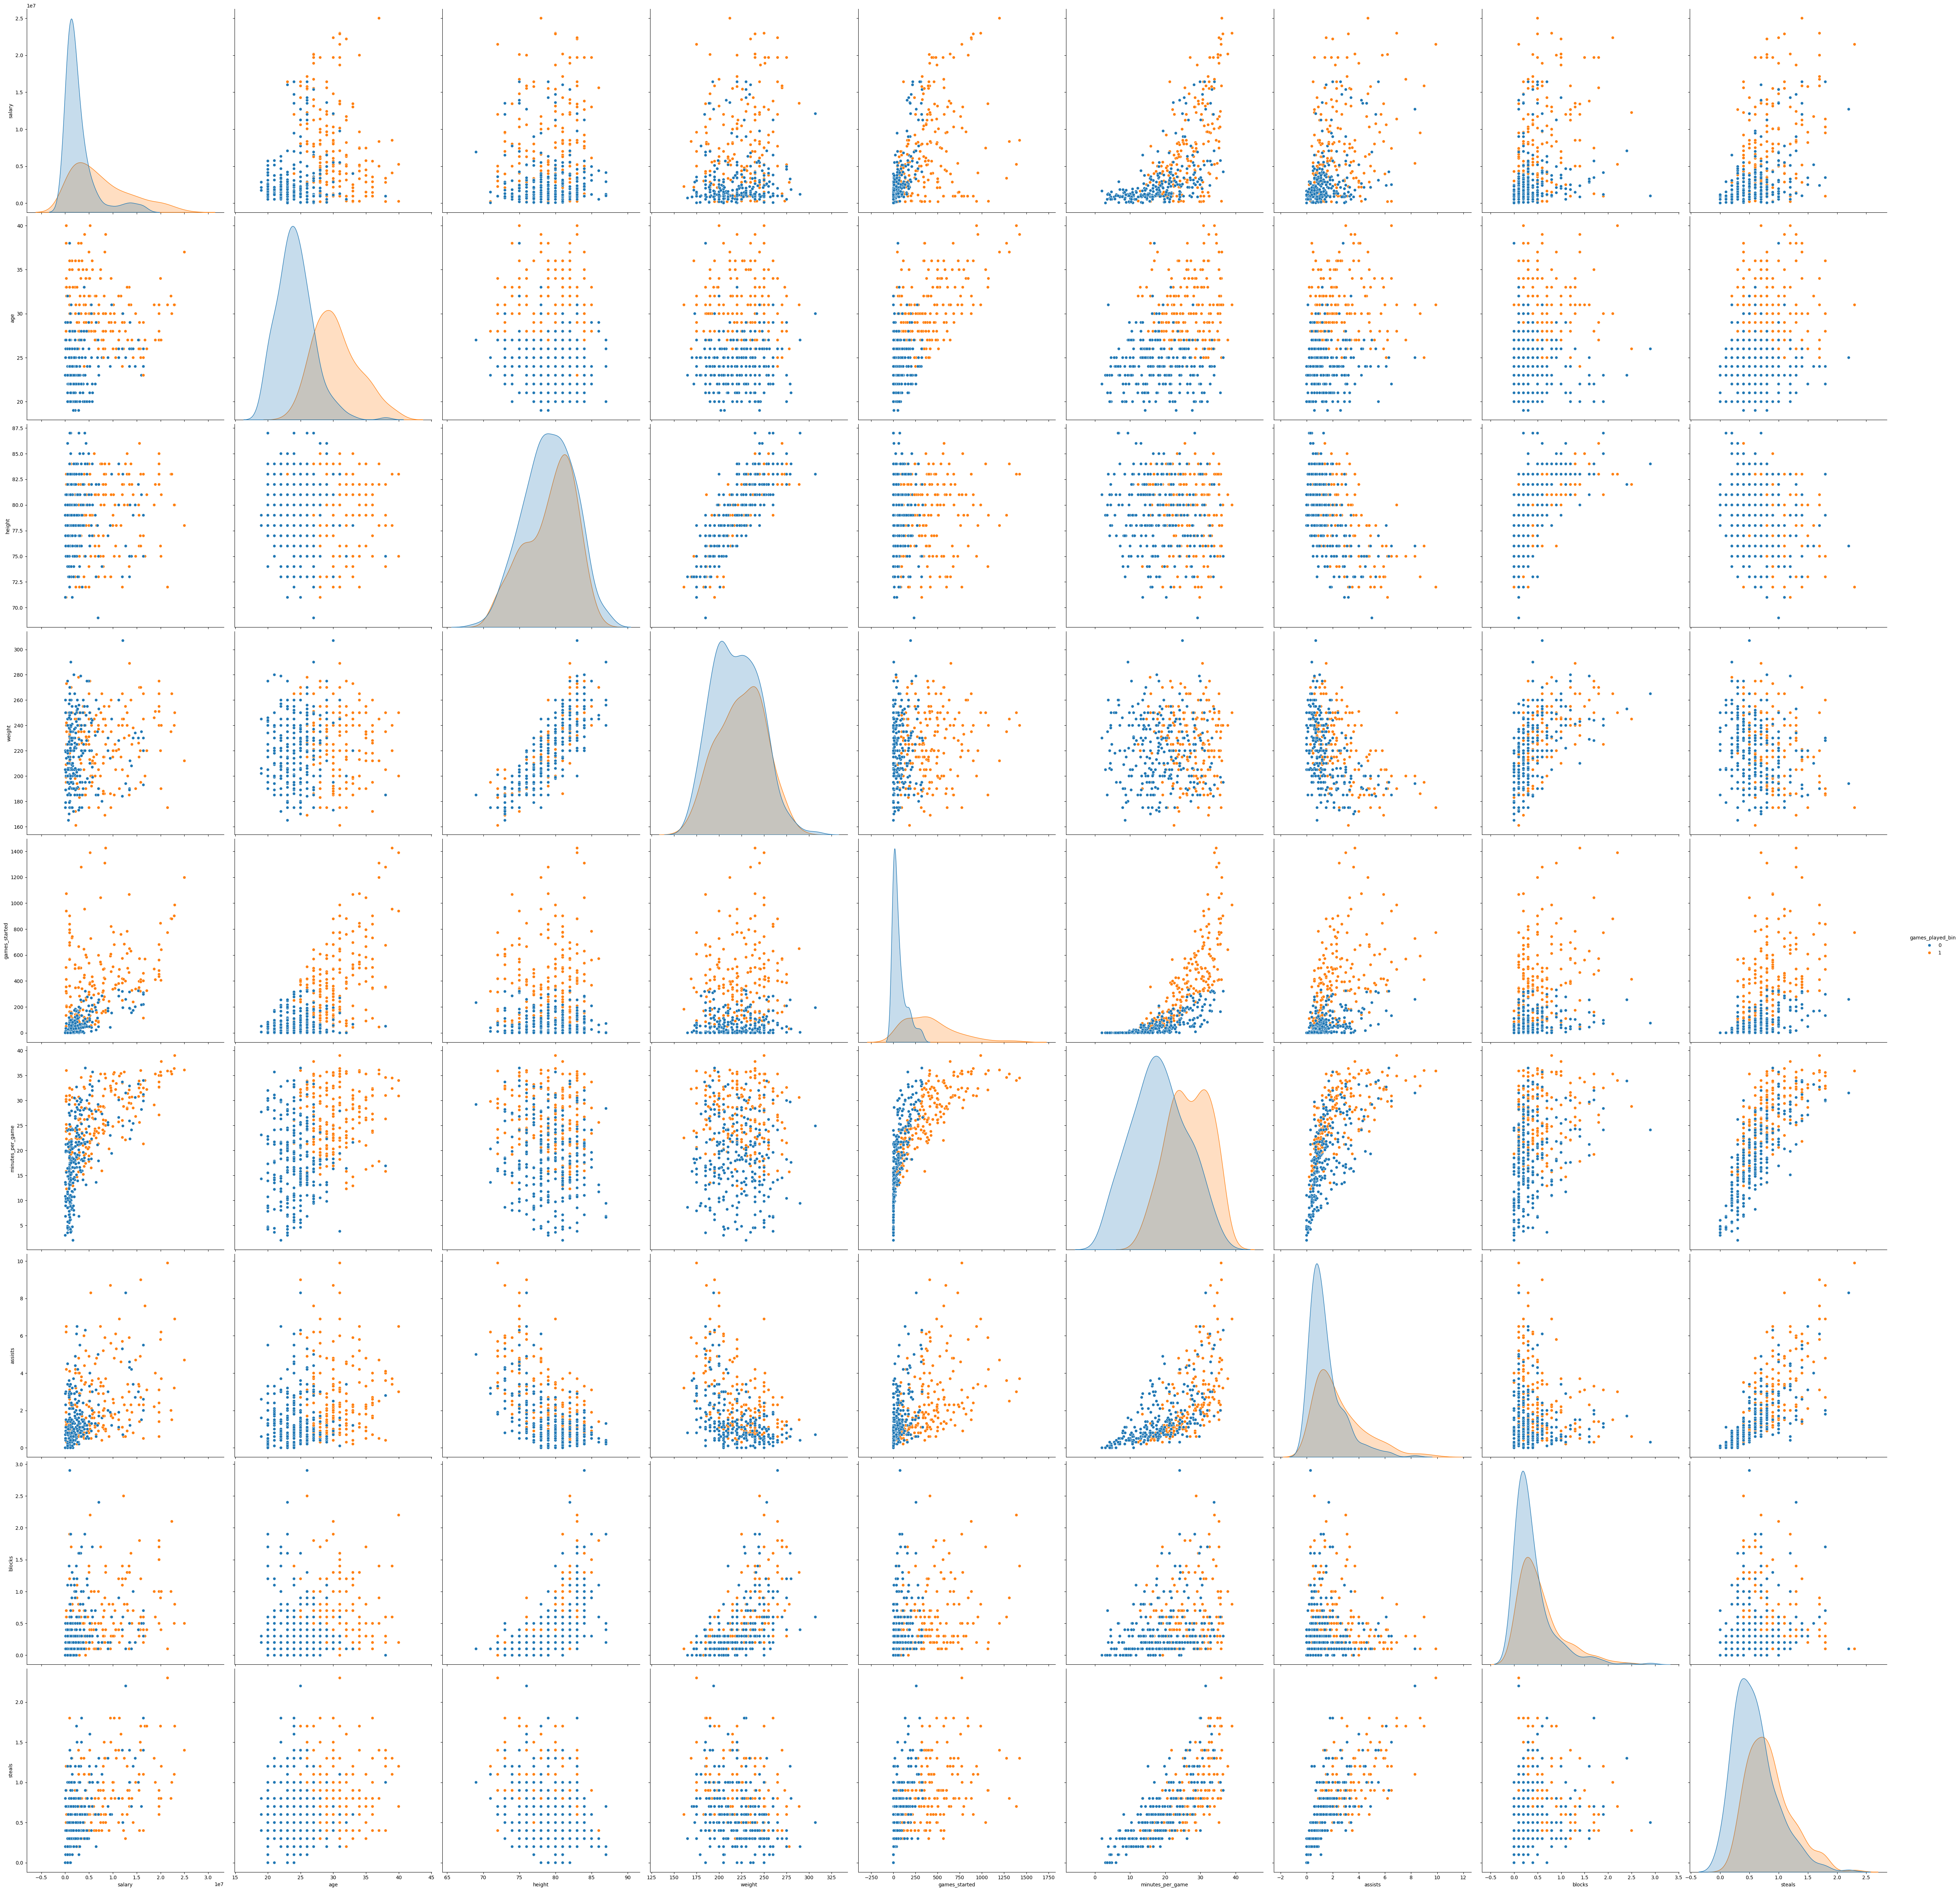

In [ ]:
#Para mirar correlaciones y variables importantes

sns.pairplot(XDB, hue='games_played_bin',size=6, vars=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'])


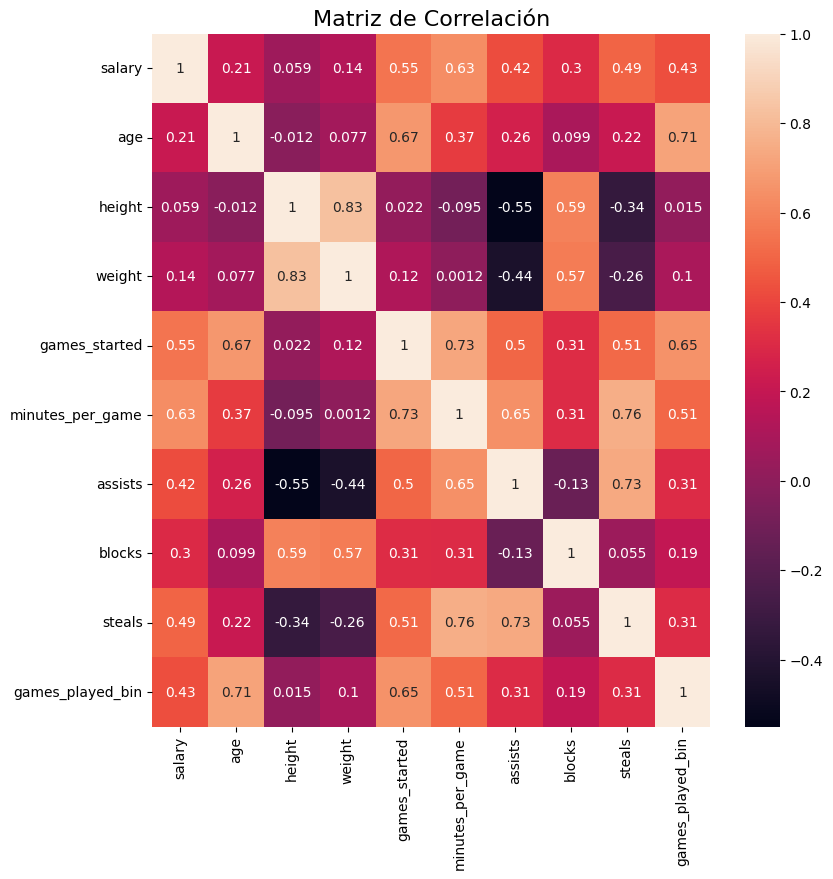

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(XD.corr(), annot=True)
plt.title("Matriz de Correlación", fontsize=16)  # Aumenta tamaño del título
plt.show()


**Variables con Mayor Correlación con "games_played_bin"**

**Age (0.71)** → La edad tiene una fuerte correlación positiva con la variable de salida, lo que indica que los jugadores con más experiencia tienden a jugar más partidos.
Games_started (0.65) → El número de juegos iniciados está fuertemente relacionado con los partidos jugados. Es lógico que quienes inician más partidos acumulen más juegos en la temporada.

**Games_per_game (0.51)** → También presenta una correlación importante, ya que el tiempo promedio jugado en cada partido influye en la acumulación de juegos totales.

**Steals (0.31)** → El número de robos tiene una correlación moderada con la cantidad de juegos jugados, lo que sugiere que jugadores más activos en defensa tienden a jugar más.

**Salary (0.43)** → Aunque no es la variable más fuerte, el salario tiene cierta relación con los minutos y partidos jugados, lo que indica que los jugadores mejor pagados suelen tener más tiempo en cancha.

Se procede con la implementación del modelo de clusterización

In [ ]:
XD1 = XD [['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd1 = XD[['games_played_bin']]


#Se van a crear cinco montoncitos de datos (perfiles de créditos)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,init='random', random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son :\n", centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es :\n",ND)
NApr=XDB.groupby('labels').agg({'games_played_bin':lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({'games_played_bin':lambda x:(x==0).sum()})
print("El número de personas con enfermedad cardiaca por cluster es:\n",NApr)
print("El número de personas sin enfermedad cardiaca por cluster es:\n",NNeg)

#Se procede con la estimación de los porcentajes de preaprobación
NApr['games_played_bin']=NApr['games_played_bin']/ND
NNeg['games_played_bin']=NNeg['games_played_bin']/ND
print("El número de jugadores por encima del promedio por cluster es:\n",NApr)
print("El número de jugadores por debajo del promedio por cluster es:\n",NNeg)


Los centroides son :
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00 6.73469388e-01]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01 4.59459459e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00 1.00000000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01 7.85714286e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01 2.15962441e-01]]


salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played  games_played_bin  labels  
0       0.5     1.8           966                 1       4  
1       0.5     1.4          1346                 1       2  
2       0.6     1.1          1274                 1       1  
3       0.2     1.0          1100                 1       1  
4       2.2     0.7          1392                 1       1  
..      ...     ...           ...               ...     ...  
440     0.2     0.4            70                 0       4  
441     0.5     1.2            24                 0       4  
442     0.0     0.0             5                 0       4  
443     0.5     1.0            68                 0       1  
444     0.0     0.0            12                 0       4  

[445 rows x 12 columns]

El tamaño de los clusters es :
 [ 49 111  16  55 214]
El número de personas con enfermedad cardiaca por cluster es:
         games_played_bin
labels                  
0                     33
1                     52
2                     16
3                     43
4                     46
El número de personas sin enfermedad cardiaca por cluster es:
         games_played_bin
labels                  
0                     16
1                     59
2                      0
3                     12
4                    168
El número de jugadores por encima del promedio por cluster es:
         games_played_bin
labels                  
0               0.673469
1               0.468468
2               1.000000
3               0.781818
4               0.214953
El número de jugadores por debajo del promedio por cluster es:
         games_played_bin
labels                  
0               0.326531
1               0.531532
2               0.000000
3               0.218182
4               0

Se procede a evaluar el modelo
(Matriz de confusión)

In [ ]:
ydp=np.zeros((len(XD),1))
Vab=np.array(NApr);Vneg=np.array(NNeg)

for k in range(len(XD)):
 napr=labels[k]

 print("La persona tal:", k)
 print("El cluster al que pertenece", napr)
 print("El porcentaje de aprobación es:",Vab[napr])
 print("El porcentaje de negación es:", Vneg[napr])
 #Me muestra el cluster al que pertenece cada persona



 #consolidamos la informacion de los aprobados y negados

 if Vab[napr]>Vneg[napr]:
    ydp[k]=1
 else:
    ydp[k]=0




La persona tal: 0
El cluster al que pertenece 4
El porcentaje de aprobación es: [0.21495327]
El porcentaje de negación es: [0.78504673]
La persona tal: 1
El cluster al que pertenece 2
El porcentaje de aprobación es: [1.]
El porcentaje de negación es: [0.]
La persona tal: 2
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.46846847]
El porcentaje de negación es: [0.53153153]
La persona tal: 3
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.46846847]
El porcentaje de negación es: [0.53153153]
La persona tal: 4
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.46846847]
El porcentaje de negación es: [0.53153153]
La persona tal: 5
El cluster al que pertenece 3
El porcentaje de aprobación es: [0.78181818]
El porcentaje de negación es: [0.21818182]
La persona tal: 6
El cluster al que pertenece 1
El porcentaje de aprobación es: [0.46846847]
El porcentaje de negación es: [0.53153153]
La persona tal: 7
El cluster al que pertenece 4
El porcentaje de

Se evalua el modelo

In [ ]:
#Se evalúa el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
#Métricas de desempeño
EX=(VP+VN)/(VP+VN+FP+FN) #Exactitud
print('La exactitud del modelo es:\n',EX)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de error:
print('La tasa de error del modelo es:\n',TE)

SE=VP/(VP+FN) #Sensibilidad
print('La sensibilidad del modelo es:\n',SE)

SP=VN/(VN+FP) #Especificidad
print('La especificidad del modelo es:\n',SP)

PR=VP/(VP+FP) #Precisión
print('La precisión del modelo es:\n',PR)

PRNeng=VN/(VN+FN) #Precisión Negativa
print('La precisión negativa del modelo es:\n',PRNeng)


La matriz de confusión es:
 [[227  28]
 [ 98  92]]
La exactitud del modelo es:
 0.7168539325842697
La tasa de error del modelo es:
 0.28314606741573034
La sensibilidad del modelo es:
 0.4842105263157895
La especificidad del modelo es:
 0.8901960784313725
La precisión del modelo es:
 0.7666666666666667
La precisión negativa del modelo es:
 0.6984615384615385


**Análisis de datos**

Con base en la información suministrada, se desarrolló un modelo de clustering para determinar si el número de juegos jugados por un jugador de la NBA está por encima del promedio. Para ello, se consideraron variables relevantes como salario, edad, estatura, peso, juegos iniciados, minutos por partido, asistencias, bloqueos y robos. Para este modelo se tomaron un total de 5 cluster como referencia,

El modelo alcanzó una exactitud del 71.68%, lo que indica un rendimiento moderado en la clasificación de jugadores con juegos jugados por encima del promedio. La precisión del modelo fue del 76.66%, lo que significa que, de los jugadores identificados como "por encima del promedio", un 76.66% realmente lo están.

Sin embargo, la sensibilidad del modelo fue del 48.42%, lo que sugiere que el modelo tiene dificultades para identificar correctamente a los jugadores que efectivamente juegan más del promedio. En contraste, la especificidad alcanzó un 89.01%, lo que indica que el modelo es mucho más efectivo para clasificar correctamente a los jugadores que juegan menos del promedio.

Estos resultados evidencian que el modelo de clustering tiene una tendencia a ser más conservador, priorizando la correcta clasificación de jugadores con menos juegos jugados, pero con una alta tasa de falsos negativos, es decir, no logra captar bien a los jugadores que realmente deberían estar en la categoría de "más juegos jugados".

**Conclusión**
**El modelo de árboles de decisión** es el más robusto y preciso, ya que ofrece la mayor exactitud (95.5%) y una alta capacidad para identificar correctamente tanto jugadores que juegan más como menos del promedio.

**Naive Bayes** tiene un desempeño intermedio, con un buen balance entre precisión y sensibilidad, pero con una menor capacidad para detectar jugadores con más juegos jugados (sensibilidad del 60%).
**El modelo de clustering** muestra el rendimiento más bajo, especialmente en la detección de jugadores por encima del promedio (sensibilidad del 48.42%), lo que sugiere que no es la mejor opción para este problema de clasificación.

Evaluamos a la persona

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


El jugador pertenece al cluster:: [1]
Probabilidad de Above Avg: 0.46846846846846846
Probabilidad de Below Avg: 0.5315315315315315


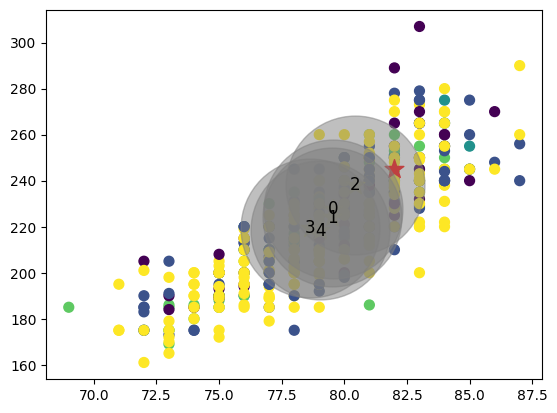

In [ ]:
XDn = ([5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4, 0])  # Added '0' for games_played_bin
XDn = np.array(XDn).reshape(1, -1)
ydn = mkm.predict(XDn)
print('El jugador pertenece al cluster::', mkm.predict(XDn))

# Assuming 'AboveAvg_PerCluster' and 'BelowAvg_PerCluster' are defined and accessible:
print('Probabilidad de Above Avg:', NApr.values[ydn][0][0]) # Correct way to index
print('Probabilidad de Below Avg:', NNeg.values[ydn][0][0]) # Correct way to index

XD = np.array(XD)
plt.scatter(XD[:, 2], XD[:, 3], c=labels, s=50, cmap='viridis')
plt.scatter(XDn[:, 2], XDn[:, 3], marker='*', s=200, facecolors='red')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', s=200, facecolors='yellow')
plt.scatter(centroids[:, 2], centroids[:, 3], alpha=0.5, marker='o', s=10000, facecolors='grey')

for i, c in enumerate(centroids):
    plt.text(c[2], c[3], str(i), fontsize=12, color='black', ha='center', va='center')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

def get_rule(tree, feature_names, class_names, node_index=0):
  """
  Returns the decision rule for a given node in the decision tree.

  Args:
    tree: The trained decision tree model.
    feature_names: List of feature names used in the model.
    class_names: List of class names (e.g., ['below average', 'above average']).
    node_index: The index of the node to get the rule for.

  Returns:
    A string representing the decision rule for the node.
  """
  tree_ = tree.tree_
  feature_id = tree_.feature[node_index]

  if feature_id != _tree.TREE_UNDEFINED:
    name = feature_names[feature_id]
    threshold = tree_.threshold[node_index]
    rule = f"{name} <= {threshold:.2f}"

    left_rule = get_rule(tree, feature_names, class_names, tree_.children_left[node_index])
    right_rule = get_rule(tree, feature_names, class_names, tree_.children_right[node_index])

    if left_rule and right_rule:
      rule = f"if {rule} then ({left_rule}) else ({right_rule})"
    elif left_rule:
      rule = f"if {rule} then ({left_rule})"
    elif right_rule:
      rule = f"if not {rule} then ({right_rule})"

    return rule
  else:
    # Leaf node
    class_probs = tree_.value[node_index][0]
    class_index = np.argmax(class_probs)
    class_name = class_names[class_index]
    prob = class_probs[class_index] / np.sum(class_probs)
    return f"{class_name} (probability: {prob:.2f})"

# Assuming 'mar' is your trained DecisionTreeClassifier and 'XD' your dataframe:
feature_names = XD.columns[:-1]  # Exclude 'games_played_bin'
class_names = ['below average', 'above average']  # Replace with your actual class names

# Get the rule for the root node (node_index=0)
rule = get_rule(mar, feature_names, class_names)
print(f"Decision Rule: {rule}")

# To predict for a specific athlete (using XDn from your previous example):
athlete_data = [5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]
prediction = mar.predict([athlete_data])[0]
probability = mar.predict_proba([athlete_data])[0][prediction]

print(f"Athlete Prediction: {class_names[prediction]}")
print(f"Probability: {probability:.2f}")

Decision Rule: if age <= 26.50 then (if games_started <= 320.00 then (if salary <= 6888459.50 then (if weight <= 276.50 then (below average (probability: 0.99)) else (below average (probability: 0.67))) else (if assists <= 1.35 then (above average (probability: 1.00)) else (below average (probability: 0.95)))) else (if minutes_per_game <= 27.70 then (below average (probability: 1.00)) else (if minutes_per_game <= 36.25 then (above average (probability: 1.00)) else (below average (probability: 1.00))))) else (if games_started <= 84.00 then (if games_started <= 38.00 then (if age <= 31.50 then (below average (probability: 1.00)) else (below average (probability: 0.50))) else (if assists <= 0.65 then (above average (probability: 0.83)) else (below average (probability: 0.65)))) else (if games_started <= 269.50 then (if steals <= 0.95 then (above average (probability: 0.88)) else (below average (probability: 0.83))) else (if age <= 27.50 then (above average (probability: 0.92)) else (above

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
